# TP1 - EJ2 - Modelos de Clasificacion Binaria

## Integrantes


● Mejia Alan Roberto - 91161 \
● Prieto Pablo Alejandro - 91561 \
● Sosa Zoraida Flores - 87039


## Objetivos

Dada un conjunto de datos provenientes de estaciones meteorologicas de Australia, mediante sus datos meteorologicos del dia actual, nuestro objetivo es predecir si llovera o no al dia siguiente.

Esto se realizara mediante la creacion de modelos de clasificacion.

El conjunto de datos esta comprendido por observaciones diarias del clima por durante 10 años de distintas localidades de Australia.

La variable a predecir es: "RainTomorrow". Es una variable de Yes o No. El criterio de tomar como positivo, o sea Yes, es que en ese dia llego a llover 1mm o mas.

Aclaracion:
* La cantidad de precipitación se recoge en milímetros (mm) o, lo que es lo mismo, en litros por metro cuadrado (l/m2)

En nuestro caso, las Ubicaciones ("Locations") a estudiar son:
* Queensland
* Victoria
* Australia Meridional
* Australia Occidental

# Importaciones

## Instalaciones

Una vez instaladas, comentarlas.

In [4]:
# !pip install 'dtreeviz'

## Bibliotecas

In [5]:
import numpy as np
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import sklearn.preprocessing as skp

pd.options.display.max_columns = None

In [112]:
from joblib import dump

## Datasets

El conjunto de datos fue extraido de: http://www.bom.gov.au/climate/data.

Estos datos diarios fueron recogidos desde una gran cantidad de estaciones meteorologias de Australia.

In [6]:
df = pd.read_csv("weatherAUS.csv")
df_original = pd.read_csv("weatherAUS.csv")

# Analisis Exploratorio

En esta seccion se realiza un analisis necesario para comprender el dominio del problema.

### Forma del dataset

In [7]:
df.shape

(145460, 23)

In [8]:
(registros, variables) = df.shape
print("Cantidad de registros: " + str(registros))
print("Cantidad de variables: " + str(variables))

Cantidad de registros: 145460
Cantidad de variables: 23


### Variables

In [9]:
variables = df.columns.to_list()
variables

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

Descripcion de las variables del dataset:

* **Date**: Fecha de la observacion de los datos meteorologicos.
* **Location**: El nombre comun de la ubicacion de la estacion meteorologica.
* **MinTemp**: La temperatura minima en grados centigrados.
* **MaxTemp**: Maxima temperatura en grados centigrados.
* **Rainfall**: La cantidad de lluvia registrada durante el día en mm.
* **Evaporation**: La denominada evaporación en tanque de clase A (mm) en las 24 horas hasta las 9 a. m.
* **Sunshine**: El número de horas de sol brillante en el día.
* **WindGustDir**: La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* **WindGustSpeed**: La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* **WindDir9am**: Dirección del viento a las 9 am.
* **WindDir3pm**: Dirección del viento a las 3 pm.
* **WindSpeed9am**: Velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 a. m.
* **WindSpeed3pm**: Velocidad del viento (km/h) promediada durante 10 minutos antes de las 3 p. m.
* **Humidity9am**: Humedad (porcentaje) a las 9 am
* **Humidity3pm**: Humedad (porcentaje) a las 3 pm
* **Pressure9am**: La presión atmosférica (hpa) se redujo al nivel medio del mar a las 9 am
* **Pressure3pm**: La presión atmosférica (hpa) se redujo al nivel medio del mar a las 3 pm
* **Cloud9am**: Fracción del cielo oscurecida por nubes a las 9:00 h. Se mide en "oktas", que son una unidad de octavos. Registra cuántos octavos del cielo están oscurecidos por nubes. Un valor de 0 indica un cielo completamente despejado, mientras que un valor de 8 indica que está completamente nublado.
* **Cloud3pm**: Fracción del cielo oscurecida por nubes a las 15:00 h. Se mide en "oktas", que son una unidad de octavos. Registra cuántos octavos del cielo están oscurecidos por nubes. Un valor de 0 indica un cielo completamente despejado, mientras que un valor de 8 indica que está completamente nublado.
* **Temp9am**: Temperatura (grados C) a las 9 am
* **Temp3pm**: Temperatura (grados C) a las 3 pm
* **RainToday**: Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9 a. m. supera 1 mm, de lo contrario 0
* **RainTomorrow**: Cantidad de lluvia del día siguiente en mm. Se utiliza para crear la variable de respuesta RainTomorrow. Una especie de medida del "riesgo".

## Tipos de datos de las variables del dataset

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Para verificar que tipo de datos son las variables se inspecciona algunos registros.

## Inspeccion de registros

En este breve inspeccion de los datos del dataset, nos sirve para entender mas el problema a estudiar.

In [11]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [12]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN

## Lista variables categoricas

> ToDo: Inspeccionar, identicar y confirmar si realmente son ese tipo de dato o no.

In [13]:
variables_categoricas = ["Location", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
variables_categoricas

['Location', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [14]:
for variable in variables_categoricas:
  print(f"Valores posibles de la variable '{variable}': {df[variable].unique()}\n")


Valores posibles de la variable 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Valores posibles de la variable 'WindDir9am': ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']

Valores posibles de la variable 'WindDir3pm': ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']

Valores posibles de la variable 'RainToday': ['No' 'Yes' nan]

Valores posibles de la variable 'Ra

## Lista variables Numericas

In [15]:
variables_numericas = [variable for variable in variables if variable not in variables_categoricas]
variables_numericas


['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

## Estadisticos de variables numericas

In [16]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

## Cantidad de Nulos

In [17]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Porcentaje de nulos de cada variabes respecto del dataset.

In [18]:
(df.isnull().sum() / len(df)) * 100


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

## Correlacion Lineal de variables

### Matriz de covarianza

In [19]:
matriz_covarianza = df.cov(numeric_only=True)
matriz_covarianza

MinTemp    MaxTemp   Rainfall  Evaporation   Sunshine  \
MinTemp        40.940738  33.525454   5.625411    12.541087   1.725898   
MaxTemp        33.525454  50.680856  -4.514935    17.432235  12.338284   
Rainfall        5.625411  -4.514935  71.877497    -1.784646  -7.650481   
Evaporation    12.541087  17.432235  -1.784646    17.587154   5.061547   
Sunshine        1.725898  12.338284  -7.650481     5.061547  14.329881   
WindGustSpeed  15.587504   6.621058  15.259043    11.434176  -1.774575   
WindSpeed9am    9.960151   0.914543   6.578953     6.944276   0.181165   
WindSpeed3pm    9.874645   3.155278   4.304781     4.626754   1.740712   
Humidity9am   -28.297842 -67.962010  36.186525   -39.707740 -34.944505   
Humidity3pm     0.808311 -74.822042  44.834725   -33.479563 -48.327853   
Pressure9am   -20.282715 -16.434329 -10.174017    -7.986312   1.120685   
Pressure3pm   -20.543672 -20.932844  -7.576328    -8.636964  -0.522097   
Cloud9am        1.459840  -5.894470   5.322848    -2.148159  -7.157973   
Cloud3pm        0.377401  -5.341742   4.348779    -2.003341  -7.050597   
Temp9am        37.388121  40.793542   0.615065    14.998134   7.121406   
Temp3pm        31.360822  48.320851  -4.652676    16.577264  12.609682   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp            15.587504      9.960151      9.874645   -28.297842   
MaxTemp             6.621058      0.914543      3.155278   -67.962010   
Rainfall           15.259043      6.578953      4.304781    36.186525   
Evaporation        11.434176      6.944276      4.626754   -39.707740   
Sunshine           -1.774575      0.181165      1.740712   -34.944505   
WindGustSpeed     185.152144     72.398294     81.038130   -56.148134   
WindSpeed9am       72.398294     79.483917     40.587723   -45.935925   
WindSpeed3pm       81.038130     40.587723     77.612576   -24.444073   
Humidity9am       -56.148134    -45.935925    -24.444073   362.109100   
Humidity3pm        -7.468954     -5.832309      3.014143   263.955507   
Pressure9am       -43.934541    -14.362381    -18.318910    18.756370   
Pressure3pm       -39.224579    -10.933409    -15.638229    24.883500   
Cloud9am            2.783675      0.643855      1.361790    24.616572   
Cloud3pm            4.014504      1.310285      0.611706    18.310821   
Temp9am            13.388658      7.427271      9.329801   -58.168936   
Temp3pm             3.120020      0.280961      1.698873   -65.685947   

               Humidity3pm  Pressure9am  Pressure3pm   Cloud9am   Cloud3pm  \
MinTemp           0.808311   -20.282715   -20.543672   1.459840   0.377401   
MaxTemp         -74.822042   -16.434329   -20.932844  -5.894470  -5.341742   
Rainfall         44.834725   -10.174017    -7.576328   5.322848   4.348779   
Evaporation     -33.479563    -7.986312    -8.636964  -2.148159  -2.003341   
Sunshine        -48.327853     1.120685    -0.522097  -7.157973  -7.050597   
WindGustSpeed    -7.468954   -43.934541   -39.224579   2.783675   4.014504   
WindSpeed9am     -5.832309   -14.362381   -10.933409   0.643855   1.310285   
WindSpeed3pm      3.014143   -18.318910   -15.638229   1.361790   0.611706   
Humidity9am     263.955507    18.756370    24.883500  24.616572  18.310821   
Humidity3pm     432.469526    -4.043760     7.548991  30.896146  29.539370   
Pressure9am      -4.043760    50.502773    48.083649  -2.626869  -2.824972   
Pressure3pm       7.548991    48.083649    49.525193  -1.222590  -1.611062   
Cloud9am         30.896146    -2.626869    -1.222590   8.335686   4.711133   
Cloud3pm         29.539370    -2.824972    -1.611062   4.711133   7.400344   
Temp9am         -29.695534   -19.259064   -21.219739  -2.588309  -2.255277   
Temp3pm         -80.403518   -13.833613   -18.583098  -5.995906  -5.980142   

                 Temp9am    Temp3pm  
MinTemp        37.388121  31.360822  
MaxTemp        40.793542  48.320851  
Rainfall        0.615065  -4.652676  
Evaporation    14.998134  16.577264  

### Matriz de Correlacion

In [20]:
matriz_correlacion = df.corr(numeric_only=True)
matriz_correlacion

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

In [21]:
matriz_correlacion_absoluta = np.abs(matriz_correlacion)
matriz_correlacion_absoluta

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000  0.074992     0.587932  0.470156   
Rainfall       0.103938  0.074992  1.000000     0.064351  0.227549   
Evaporation    0.466993  0.587932  0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156  0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021  0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am    0.232899  0.504110  0.224405     0.504092  0.490819   
Humidity3pm    0.006089  0.508855  0.255755     0.390243  0.629130   
Pressure9am    0.450970  0.332061  0.168154     0.270362  0.041970   
Pressure3pm    0.461292  0.427167  0.126534     0.293581  0.019719   
Cloud9am       0.078754  0.289370  0.198528     0.183793  0.675323   
Cloud3pm       0.021605  0.277921  0.172403     0.182618  0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503  0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173     0.232899   
MaxTemp             0.067615      0.014450      0.050300     0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400     0.504092   
Sunshine            0.034750      0.005499      0.053834     0.490819   
WindGustSpeed       1.000000      0.605303      0.686307     0.215070   
WindSpeed9am        0.605303      1.000000      0.519547     0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000     0.145525   
Humidity9am         0.215070      0.270858      0.145525     1.000000   
Humidity3pm         0.026327      0.031614      0.016432     0.666949   
Pressure9am         0.458744      0.228743      0.296351     0.139442   
Pressure3pm         0.413749      0.175817      0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030     0.471354   
Temp3pm             0.032748      0.004569      0.027778     0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089     0.450970     0.461292  0.078754  0.021605   
MaxTemp           0.508855     0.332061     0.427167  0.289370  0.277921   
Rainfall          0.255755     0.168154     0.126534  0.198528  0.172403   
Evaporation       0.390243     0.270362     0.293581  0.183793  0.182618   
Sunshine          0.629130     0.041970     0.019719  0.675323  0.703930   
WindGustSpeed     0.026327     0.458744     0.413749  0.071736  0.109168   
WindSpeed9am      0.031614     0.228743     0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432     0.296351     0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000     0.027544     0.051997  0.517120  0.523120   
Pressure9am       0.027544     1.000000     0.961326  0.129796  0.147861   
Pressure3pm       0.051997     0.961326     1.000000  0.060772  0.084778   
Cloud9am          0.517120     0.129796     0.060772  1.000000  0.603564   
Cloud3pm          0.523120     0.147861     0.084778  0.603564  1.000000   
Temp9am           0.221019     0.422556     0.470187  0.136959  0.126659   
Temp3pm           0.557841     0.286770     0.389548  0.302060  0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192  0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

> Se puede fijar un criterio para poder ver cuales son los valores que cumplen.

In [22]:
criterio_linealidad_min = 0.5
matriz_correlacion_con_criterio_linealidad = matriz_correlacion_absoluta[matriz_correlacion_absoluta > criterio_linealidad_min]
matriz_correlacion_con_criterio_linealidad

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555       NaN          NaN       NaN   
MaxTemp        0.736555  1.000000       NaN     0.587932       NaN   
Rainfall            NaN       NaN       1.0          NaN       NaN   
Evaporation         NaN  0.587932       NaN     1.000000       NaN   
Sunshine            NaN       NaN       NaN          NaN  1.000000   
WindGustSpeed       NaN       NaN       NaN          NaN       NaN   
WindSpeed9am        NaN       NaN       NaN          NaN       NaN   
WindSpeed3pm        NaN       NaN       NaN          NaN       NaN   
Humidity9am         NaN  0.504110       NaN     0.504092       NaN   
Humidity3pm         NaN  0.508855       NaN          NaN  0.629130   
Pressure9am         NaN       NaN       NaN          NaN       NaN   
Pressure3pm         NaN       NaN       NaN          NaN       NaN   
Cloud9am            NaN       NaN       NaN          NaN  0.675323   
Cloud3pm            NaN       NaN       NaN          NaN  0.703930   
Temp9am        0.901821  0.887210       NaN     0.545115       NaN   
Temp3pm        0.708906  0.984503       NaN     0.572893       NaN   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp                  NaN           NaN           NaN          NaN   
MaxTemp                  NaN           NaN           NaN     0.504110   
Rainfall                 NaN           NaN           NaN          NaN   
Evaporation              NaN           NaN           NaN     0.504092   
Sunshine                 NaN           NaN           NaN          NaN   
WindGustSpeed       1.000000      0.605303      0.686307          NaN   
WindSpeed9am        0.605303      1.000000      0.519547          NaN   
WindSpeed3pm        0.686307      0.519547      1.000000          NaN   
Humidity9am              NaN           NaN           NaN     1.000000   
Humidity3pm              NaN           NaN           NaN     0.666949   
Pressure9am              NaN           NaN           NaN          NaN   
Pressure3pm              NaN           NaN           NaN          NaN   
Cloud9am                 NaN           NaN           NaN          NaN   
Cloud3pm                 NaN           NaN           NaN          NaN   
Temp9am                  NaN           NaN           NaN          NaN   
Temp3pm                  NaN           NaN           NaN          NaN   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp                NaN          NaN          NaN       NaN       NaN   
MaxTemp           0.508855          NaN          NaN       NaN       NaN   
Rainfall               NaN          NaN          NaN       NaN       NaN   
Evaporation            NaN          NaN          NaN       NaN       NaN   
Sunshine          0.629130          NaN          NaN  0.675323  0.703930   
WindGustSpeed          NaN          NaN          NaN       NaN       NaN   
WindSpeed9am           NaN          NaN          NaN       NaN       NaN   
WindSpeed3pm           NaN          NaN          NaN       NaN       NaN   
Humidity9am       0.666949          NaN          NaN       NaN       NaN   
Humidity3pm       1.000000          NaN          NaN  0.517120  0.523120   
Pressure9am            NaN     1.000000     0.961326       NaN       NaN   
Pressure3pm            NaN     0.961326     1.000000       NaN       NaN   
Cloud9am          0.517120          NaN          NaN  1.000000  0.603564   
Cloud3pm          0.523120          NaN          NaN  0.603564  1.000000   
Temp9am                NaN          NaN          NaN       NaN       NaN   
Temp3pm           0.557841          NaN          NaN       NaN       NaN   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall            NaN       NaN  
Evaporation    0.545115  0.572893  
Sunshine            NaN       NaN  
WindGustSpeed       NaN       NaN  
WindSpeed9am        NaN       NaN  
Wi

#### Heatmap

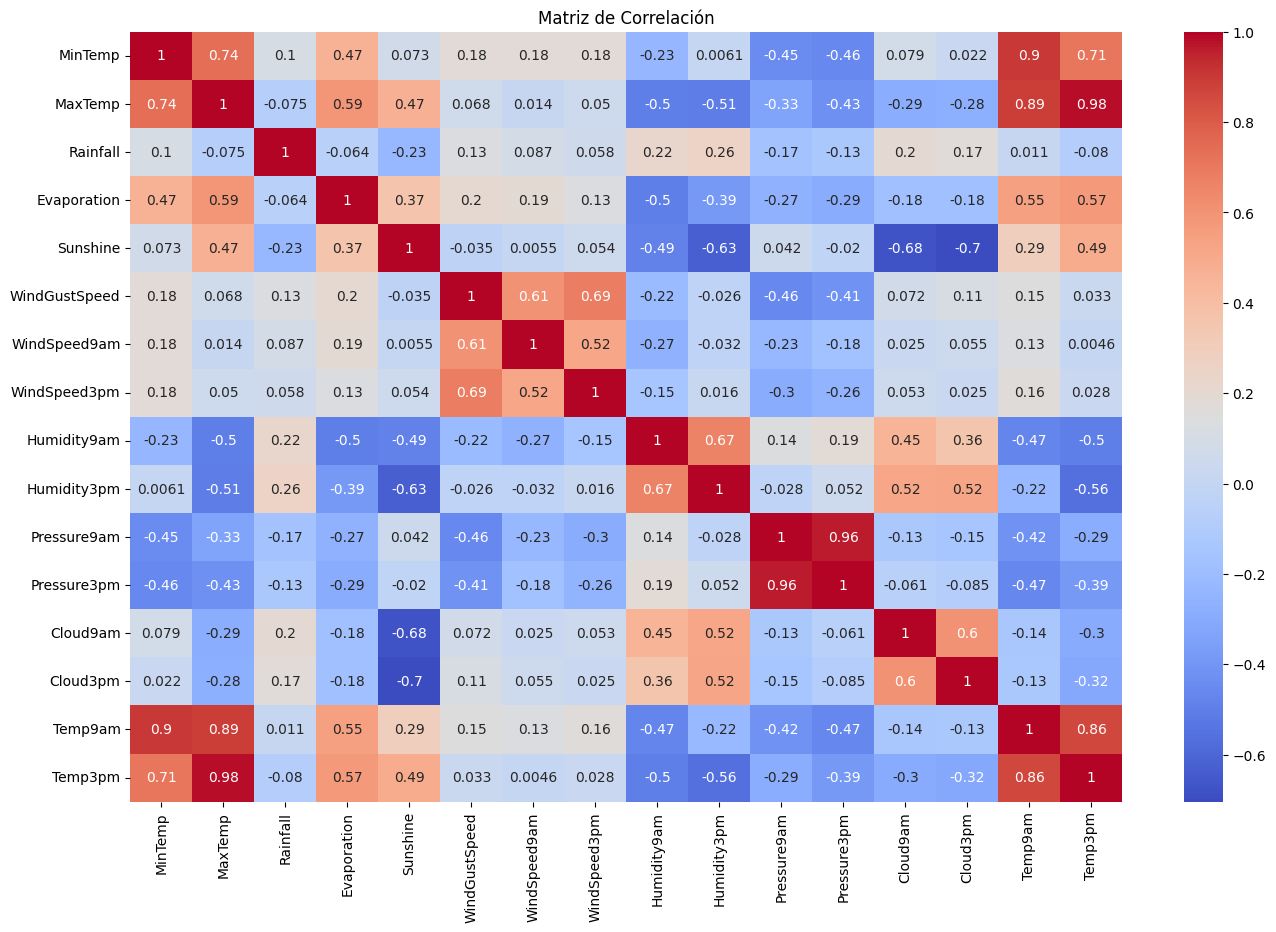

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
Tal como se peude observar, la alta correlacion lineal de las variables:
  * Pressure9am con Pressure3pm.
  * Temp9am con Temp3pm.
  * MaxTemp con Temp3pm.
  * Temp9am con MaxTemp, menor medida que las anteriores mencionadas.

Esta alta correlacion entre las variables puede ser motivo suficiente para eliminar ciertas variables dado que no aportaran mayor informacion que la de correlaccionada. Permitiendo optimizar aun mas el entrenamiento de los modelos de clasificacion.

### Pairplot

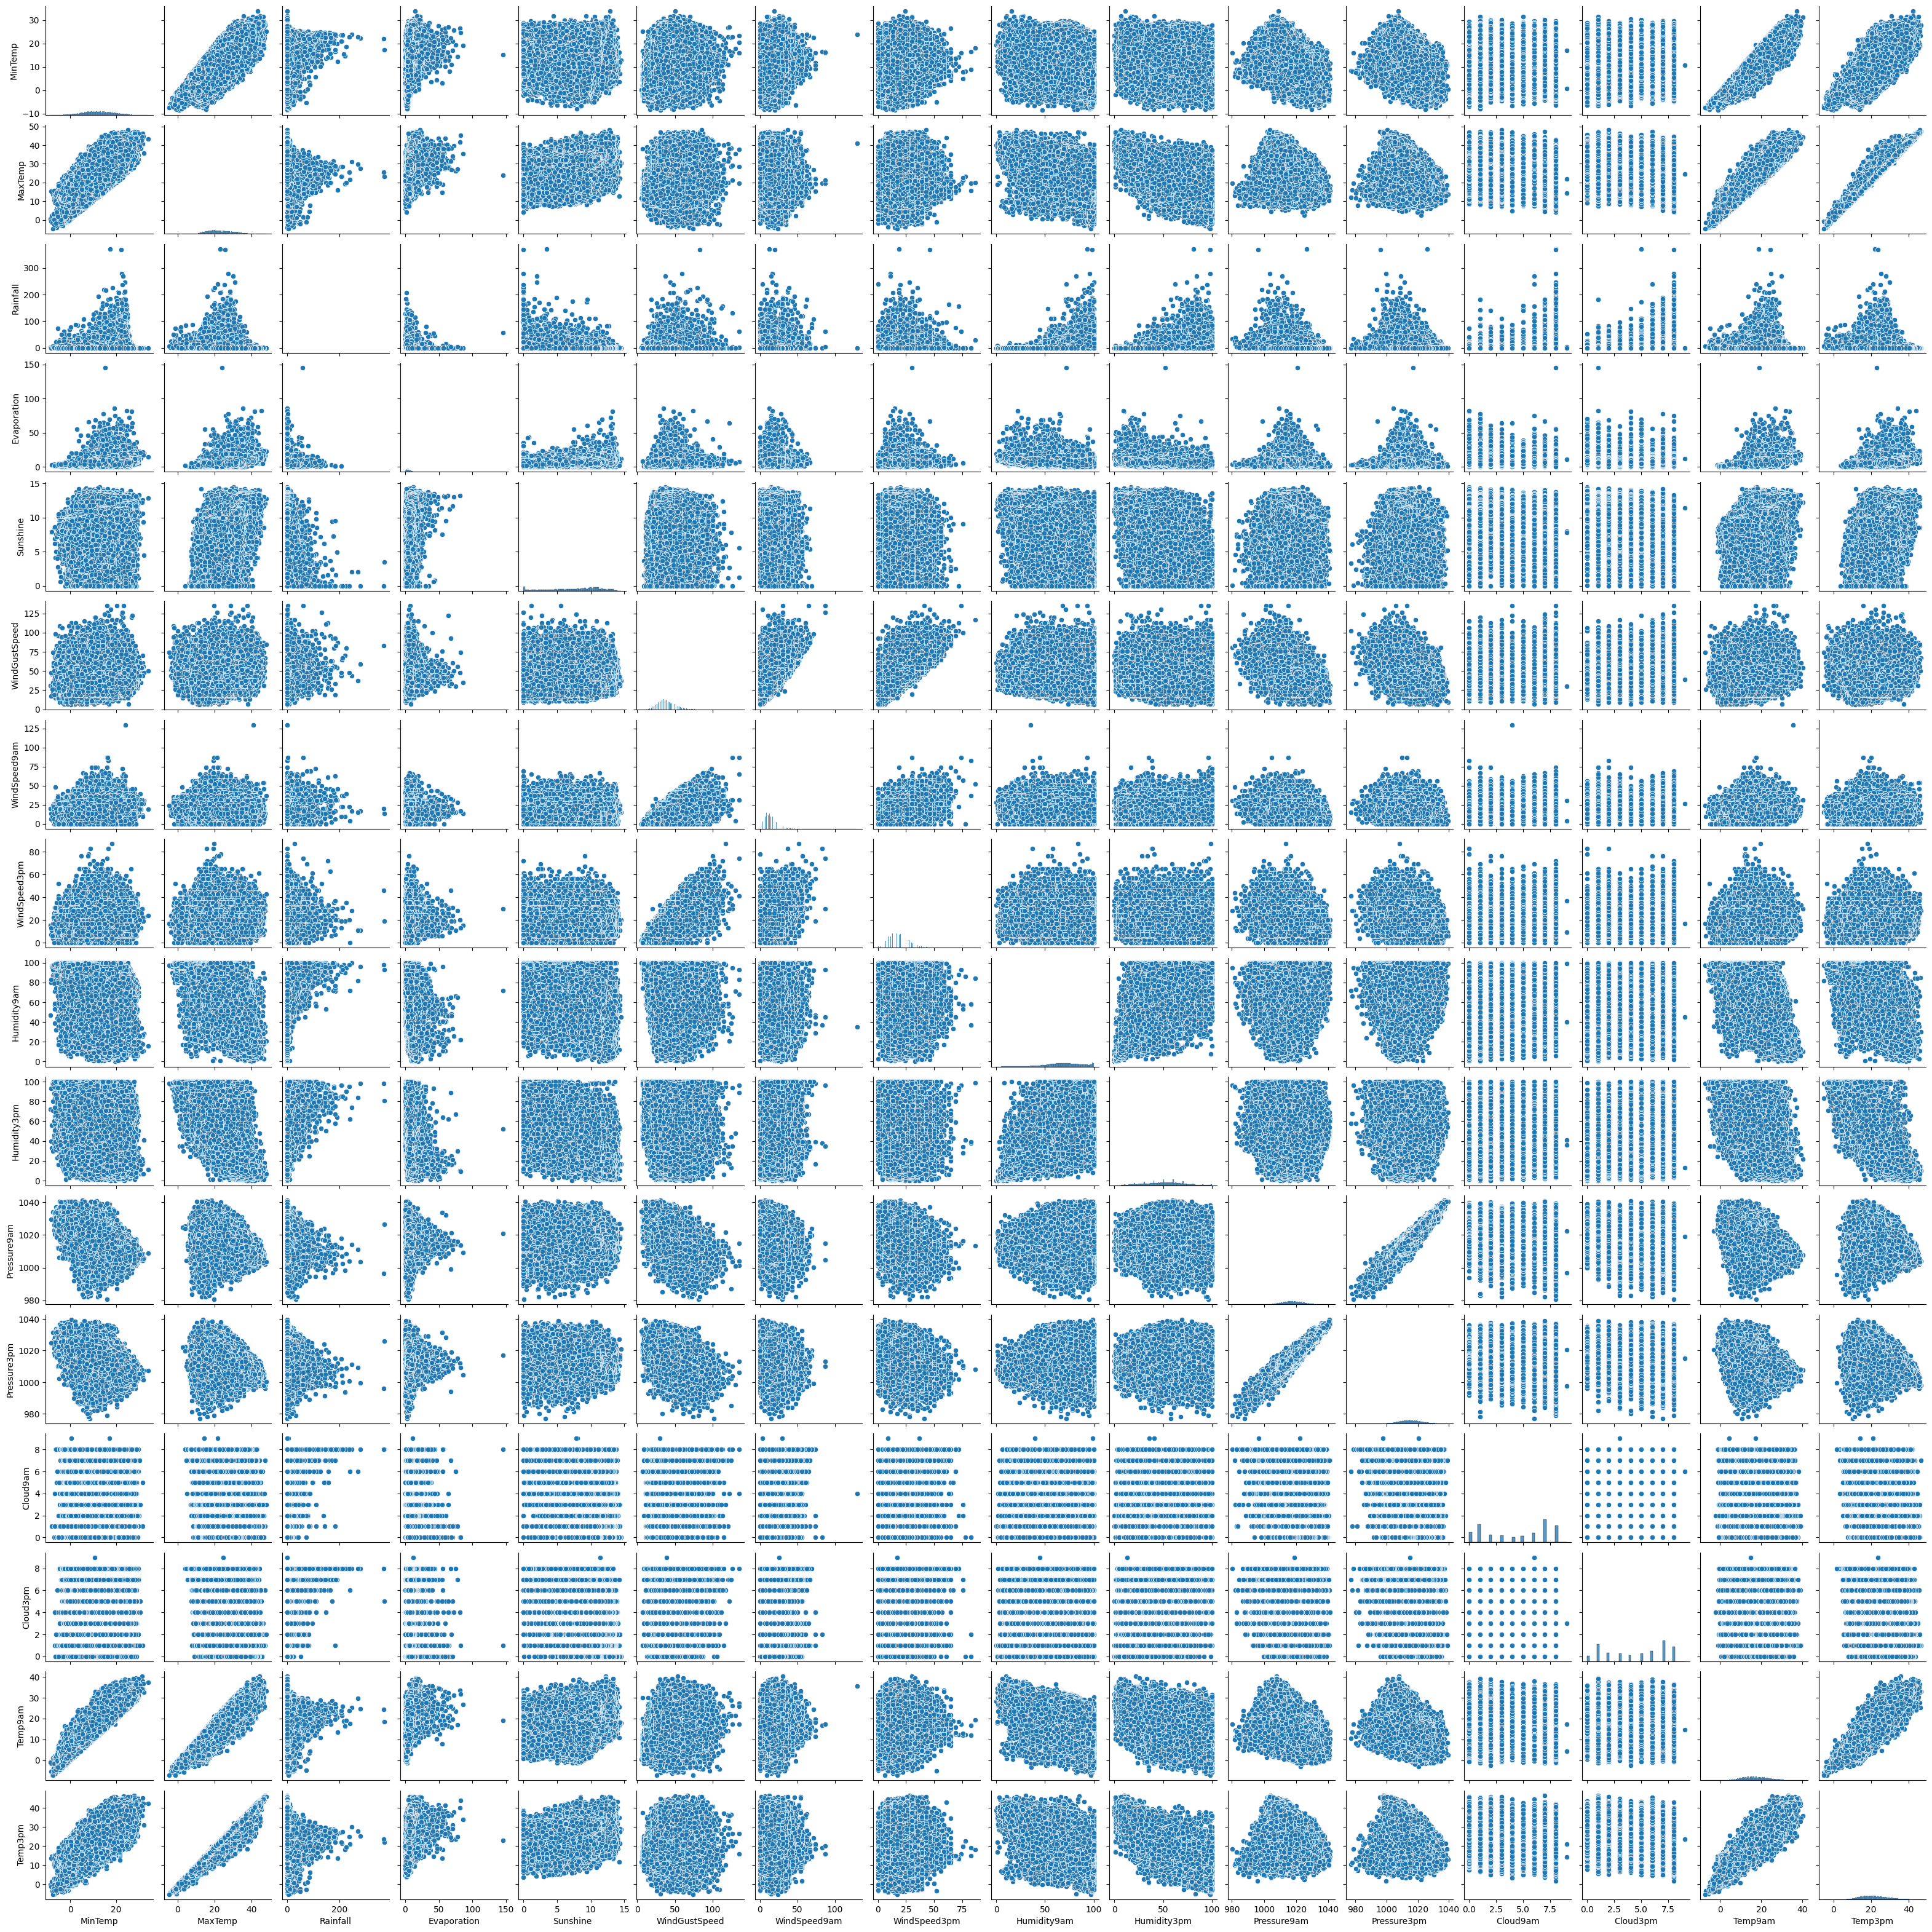

In [24]:
sns.pairplot(df, height = 2)
plt.show()

# Preprocesamiento de datos

En esta seccion se analiza y realiza limpieza de datos, generaciones de nuevos features, etc.

## Eliminar variables

* Debido a que hay mucha fuerza de correlacion entre varias variables, se puede eliminar una, y has poder renombrarlas. Como Temp9am, Temp3pm  en una sola que sea Temperatura del dia
* Otra estrategia seria borrar las variables de alto porcentaje.

Primero se recuerda el porcentaje de nulos en el dataset.

In [25]:
(df.isnull().sum() / len(df)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

### Elimacion de variables por alta cantidad de nulos

* Las variables que presentan  un alto grado de nulos se proceden a ser eliminadas

Observaciones:

* La cantida de datos nulos en las variables : Evaportaion, Sunshine, Cloud9am, Cloud3pm. Son muy altas para estimarlas, casi que estariamos inventando las distribuciones de tales variables. Por eso se decide borrar tales variables.

In [26]:
df.shape

(145460, 23)

In [27]:
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)


In [28]:
(df.isnull().sum() / len(df)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [29]:
df.shape

(145460, 19)

Las variables que estan muy correlacionadas pensamos que es mejor no tenerlas como variables dado que no aportan informacion relevante.

In [30]:
df = df.drop(['Pressure9am', 'Temp9am', 'Temp3pm'], axis=1)

In [31]:
(df.isnull().sum() / len(df)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure3pm      10.331363
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [32]:
df.shape

(145460, 16)

## Eliminacion de registros con nulos

Un primer acercamiento que se puede realizar es mediante la eliminacion de datos

In [33]:
df_registrosBorrados = df.copy()

In [34]:
df_registrosBorrados.dropna(inplace=True)


In [35]:
df_registrosBorrados.shape

(113011, 16)

In [36]:
porcentaje_datos_nulos_borrados = (df.shape[0] - df_registrosBorrados.shape[0])/df.shape[0] * 100
print(f"Porcentaje de datos nulos borrados: {porcentaje_datos_nulos_borrados}%")

Porcentaje de datos nulos borrados: 22.307850955589164%


## Nuevos features

* **Las variable de Date, podria ser transformada por estaciones del año.**

## Transformacion de variables

### Date a Estaciones del año

Debido a que por experiencia podemos decir que puede haber cierta correlacion entre las estaciones del año y las lluvias, se procede a convertir la variable Date a variable categorica de estaciones. Mas adelante se hara la conversion necesaria para que lo pueda usar en el entrenamiento del arbol de decision.

Funcion a usar para realizar el cambio

In [37]:
def obtener_estacion_australia(fecha):
    mes = fecha.month
    dia = fecha.day
    if (mes == 12) or (mes in [1, 2]):
        return 'Verano'
    elif (mes in [3, 4, 5]):
        return 'Otoño'
    elif (mes in [6, 7, 8]):
        return 'Invierno'
    elif (mes in [9, 10, 11]):
        return 'Primavera'

In [38]:
df_registrosBorrados['Date'] = pd.to_datetime(df_registrosBorrados['Date'])
df_registrosBorrados['Estacion'] = df_registrosBorrados['Date'].apply(obtener_estacion_australia)
df_registrosBorrados = df_registrosBorrados.drop(['Date'], axis=1)

In [39]:
df_registrosBorrados.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure3pm RainToday RainTomorrow Estacion  
0       1007.1        No           No   Verano  
1       1007.8        No           No   Verano  
2       1008.7        No           No   Verano  
3       1012.8        No           No   Verano  
4       1006.0        No           No   Verano

### Transformacion de Location a Region

In [40]:
df_regions_locations = pd.read_excel('aus_coordinates.xlsx', sheet_name='aus_coordinates')

In [41]:
df_regions_locations.head()

Region       Location            Coordinates
0  Australia Meridional       Adelaide   (-34.9285, 138.6007)
1            Queensland         Albany   (-35.0275, 117.8847)
2   Nueva Gales del Sur         Albury   (-36.0737, 146.9135)
3  Territorio del Norte   AliceSprings   (-23.6980, 133.8807)
4   Nueva Gales del Sur  BadgerysCreek   (-33.9209, 150.7738)

In [42]:
# Filtrar solo las regiones deseadas
regiones_interes = ['Queensland', 'Victoria', 'Australia Meridional', 'Australia Occidental']

In [43]:
df_registrosBorrados = pd.merge(df_registrosBorrados,
                                df_regions_locations[['Location', 'Region']],
                                on='Location',
                                how='left')

In [44]:
# Definir las regiones de interés
regiones_interes = ['Queensland', 'Victoria', 'Australia Meridional', 'Australia Occidental']

# Filtrar el dataframe por las regiones de interés
df_registros_filtrados = df_registrosBorrados[df_registrosBorrados['Region'].isin(regiones_interes)]


In [45]:
df_registros_filtrados.shape

(63972, 17)

In [46]:
df_registros_filtrados.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
18398  Richmond     15.4     39.0       0.0         NNW           44.0   
18399  Richmond     21.6     38.9       0.0         SSW           46.0   
18400  Richmond     21.2     32.6       1.6          NW           48.0   
18401  Richmond     23.0     36.4       0.2         ESE           46.0   
18402  Richmond     23.0     41.0       0.0          SE           69.0   

      WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
18398         NE         NW           4.0          19.0         60.0   
18399        NNE         NW           9.0          17.0         61.0   
18400        ENE        NNW          13.0          22.0         65.0   
18401        NNE        ENE          17.0          19.0         53.0   
18402         NW        WNW          20.0          35.0         51.0   

       Humidity3pm  Pressure3pm RainToday RainTomorrow Estacion    Region  
18398         19.0       1008.8        No           No   Verano  Victoria  
18399         26.0       1006.6        No          Yes   Verano  Victoria  
18400         48.0       1005.7       Yes           No   Verano  Victoria  
18401         40.0       1006.0        No           No   Verano  Victoria  
18402         23.0       1002.6        No           No   Verano  Victoria

In [47]:
df_registros_filtrados = df_registros_filtrados.drop(['Location'], axis=1)

In [48]:
df_registros_filtrados.head()

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
18398     15.4     39.0       0.0         NNW           44.0         NE   
18399     21.6     38.9       0.0         SSW           46.0        NNE   
18400     21.2     32.6       1.6          NW           48.0        ENE   
18401     23.0     36.4       0.2         ESE           46.0        NNE   
18402     23.0     41.0       0.0          SE           69.0         NW   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
18398         NW           4.0          19.0         60.0         19.0   
18399         NW           9.0          17.0         61.0         26.0   
18400        NNW          13.0          22.0         65.0         48.0   
18401        ENE          17.0          19.0         53.0         40.0   
18402        WNW          20.0          35.0         51.0         23.0   

       Pressure3pm RainToday RainTomorrow Estacion    Region  
18398       1008.8        No           No   Verano  Victoria  
18399       1006.6        No          Yes   Verano  Victoria  
18400       1005.7       Yes           No   Verano  Victoria  
18401       1006.0        No           No   Verano  Victoria  
18402       1002.6        No           No   Verano  Victoria

### Transformacioness One Hot Encoding

Debido a que los modelos de arboles que vamos a usar se entrenan con valores numericos, las variables categoricas se van a transformar en numericas mediante la tecnica de One Hot Encoding

Las varibles a transformar de esta manera son:
* WindGustDir
* WindDir9am
* WindDir3pm
* RainToday
* RainTomorrow
* Estacion
* Region

In [49]:
df_registros_filtrados_oneHotEncoding = pd.get_dummies(df_registros_filtrados, columns=["WindGustDir","WindDir9am","WindDir3pm", "RainToday", "RainTomorrow", "Estacion", "Region"], drop_first=True)

In [50]:
df_registros_filtrados_oneHotEncoding.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
18398     15.4     39.0       0.0           44.0           4.0          19.0   
18399     21.6     38.9       0.0           46.0           9.0          17.0   
18400     21.2     32.6       1.6           48.0          13.0          22.0   
18401     23.0     36.4       0.2           46.0          17.0          19.0   
18402     23.0     41.0       0.0           69.0          20.0          35.0   

       Humidity9am  Humidity3pm  Pressure3pm  WindGustDir_ENE  \
18398         60.0         19.0       1008.8            False   
18399         61.0         26.0       1006.6            False   
18400         65.0         48.0       1005.7            False   
18401         53.0         40.0       1006.0            False   
18402         51.0         23.0       1002.6            False   

       WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  \
18398            False          False           False            False   
18399            False          False           False            False   
18400            False          False           False            False   
18401             True          False           False            False   
18402            False          False           False            False   

       WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  WindGustDir_SE  \
18398             True           False          False           False   
18399            False           False          False           False   
18400            False            True          False           False   
18401            False           False          False           False   
18402            False           False          False            True   

       WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  \
18398            False            False           False          False   
18399            False             True           False          False   
18400            False            False           False          False   
18401            False            False           False          False   
18402            False            False           False          False   

       WindGustDir_WNW  WindGustDir_WSW  WindDir9am_ENE  WindDir9am_ESE  \
18398            False            False           False           False   
18399            False            False           False           False   
18400            False            False            True           False   
18401            False            False           False           False   
18402            False            False           False           False   

       WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  WindDir9am_NNW  \
18398         False           True           False           False   
18399         False          False            True           False   
18400         False          False           False           False   
18401         False          False            True           False   
18402         False          False           False           False   

       WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
18398          False         False          False           False   
18399          False         False          False           False   
18400          False         False          False           False   
18401          False         False          False           False   
18402           True         False          False           False   

       WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
18398           False          False         False           False   
18399           False          False         False           False   
18400           False          False         False           False   
18401           False          False         False           False   
18402           False          False         False           False   

       WindDir9am_WSW  WindDir3pm_ENE  WindDir3pm_ESE  WindDir3pm_N  \
18398           False      

> Apartir de aca tenemos los datos limpios para poder realizar los entrenamientos correspondientes.

In [51]:
df_clean = df_registros_filtrados_oneHotEncoding.copy()

# Arboles de Decision

El arbol de decision es uno de los algoritmos mas rusticos/basicos/simples de la ciencia de datos.

El arbol de decision va encapsulando/clasificando las observaciones a partir de limites que establece sobre esas variables.

Encontrar el limite en cada variable es de imporantcia para poder clasificar dentro de lo conveniente.

Se analiza cual es la varaible que permita separar mas homogeneamente estos puntos de corte. Cuales son las que tienen mayor informacion.

Este proceso de ver cual es la varaible que mejor clasifica y con su mejor limite, se hace de manera recursiva para las demas varaibles. En orden de decrecimiento de variable que mejor separa.

Al haber mayor bifurcacion obtenemos mayor precision a la hora de clasificacion muestras/observaciones.

Se puede obtener arboles de muy gran profundidad que clasifican con mucha precision.

El modelo entrena los parametros, que son los puntos de corte de cada variable para clasificar. El modelo sera ese conjunto de reglas/parametros. Luego guardamos esas reglas y lo usamos como modelo para realizar predicciones.

## Entrenamiento y Prediccion

In [52]:
df_clean.RainTomorrow_Yes.value_counts(normalize= True)

RainTomorrow_Yes
False    0.771447
True     0.228553
Name: proportion, dtype: float64

Esto puede representar un problema por no tener un dataset balanceado para el entrenamiento de varios modelos, pero no es el caso para los modelos de arboles.

Vamos a crear un conjunto de entrenamiento con el 80% de los datos y otro conjunto de test con el 20%.

Intentaremos respetar la proporcion de nuestro "target" en ambos conjuntos.

In [53]:
column_names = df_clean.columns.tolist()
print(column_names)


['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'RainToday_Yes', 'RainTomorrow_Yes', 'Estacion_Otoño', 'Estacion_Primavera',

In [54]:
# features=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
#           'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
#           'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
#           'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
#           'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
#           'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
#           'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'RainToday_Yes',
#           'Estacion_Otoño', 'Estacion_Primavera', 'Estacion_Verano', 'Region_Australia Occidental', 'Region_Queensland', 'Region_Victoria']



# target='RainTomorrow_Yes'
# 'Pressure9am', 'Temp9am', 'Temp3pm'

In [55]:
features=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
          'Pressure3pm', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
          'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
          'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
          'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
          'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
          'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'RainToday_Yes',
          'Estacion_Otoño', 'Estacion_Primavera', 'Estacion_Verano', 'Region_Australia Occidental', 'Region_Queensland', 'Region_Victoria']



target='RainTomorrow_Yes'

Verifico el balance del target

In [56]:
df_clean[target].value_counts(normalize=True)*100

RainTomorrow_Yes
False    77.144688
True     22.855312
Name: proportion, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_clean[features].values,
                                                    df_clean[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=df_clean[target].values,) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 51177
# Datos Prueba: 12795
% Positivos Entrenamiento: 22.856
% Positivos Prueba: 22.853


In [58]:
# #Creo un dataset con los features que voy a usar para clasificar
# ds_trabajo_x=df_clean.drop(['RainTomorrow_Yes'], axis='columns', inplace=False)

# #Creo un dataset con la variable target
# ds_trabajo_y = df_clean['RainTomorrow_Yes'].copy()

# #Genero los conjuntos de train y test
# x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
#                                                     ds_trabajo_y,
#                                                     test_size=0.3,  #proporcion 70/30
#                                                     random_state=2) #semilla

### Randomized Search Cross Validation

In [59]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

In [60]:
#Cantidad de combinaciones que quiero porbar
n=10

In [61]:
#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}

In [62]:
#Cantidad de splits para el Cross Validation
folds=5

In [63]:
#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

In [64]:
#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)  # Falta el Random state, para fijar la semilla

In [65]:
#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

In [66]:
randomcv

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.        , 0.00555556, 0.01111111, 0.01666667, 0.02222222,
       0.02777778, 0.03333333, 0.03888889, 0.04444444, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [67]:
#Mejores hiperparametros del arbol
print("Mejores hiperparametros encontrados: ", randomcv.best_params_)
#Mejor métrica
print("Mejor score: ",randomcv.best_score_)

Mejores hiperparametros encontrados:  {'max_depth': 4, 'criterion': 'entropy', 'ccp_alpha': 0.03333333333333333}
Mejor score:  0.568898378640113


In [68]:
pd.DataFrame(randomcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.428232      0.066145         0.063486        0.012121   
1       0.302074      0.014114         0.040375        0.001215   
2       0.328380      0.009479         0.042663        0.004474   
3       0.241304      0.017504         0.043395        0.004532   
4       0.298961      0.004662         0.042191        0.004494   
5       0.239288      0.006407         0.039540        0.000401   
6       0.302996      0.064902         0.052098        0.013777   
7       0.467673      0.020149         0.063008        0.011888   
8       0.230049      0.005057         0.039883        0.001340   
9       0.198908      0.005253         0.041518        0.002034   

   param_max_depth param_criterion  param_ccp_alpha  \
0                3            gini         0.005556   
1                4            gini         0.000000   
2                5            gini         0.016667   
3                2            gini         0.016667   
4                4         entropy         0.005556   
5                2            gini         0.011111   
6                3         entropy         0.005556   
7                4         entropy         0.033333   
8                2         entropy         0.000000   
9                1            gini         0.011111   

                                              params  split0_test_score  \
0  {'max_depth': 3, 'criterion': 'gini', 'ccp_alp...           0.537313   
1  {'max_depth': 4, 'criterion': 'gini', 'ccp_alp...           0.593781   
2  {'max_depth': 5, 'criterion': 'gini', 'ccp_alp...           0.564706   
3  {'max_depth': 2, 'criterion': 'gini', 'ccp_alp...           0.564706   
4  {'max_depth': 4, 'criterion': 'entropy', 'ccp_...           0.544287   
5  {'max_depth': 2, 'criterion': 'gini', 'ccp_alp...           0.401163   
6  {'max_depth': 3, 'criterion': 'entropy', 'ccp_...           0.544287   
7  {'max_depth': 4, 'criterion': 'entropy', 'ccp_...           0.570865   
8  {'max_depth': 2, 'criterion': 'entropy', 'ccp_...           0.401163   
9  {'max_depth': 1, 'criterion': 'gini', 'ccp_alp...           0.564706   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.550523           0.533626           0.548673           0.535724   
1           0.561478           0.546366           0.552890           0.544262   
2           0.562433           0.560613           0.566194           0.575692   
3           0.562433           0.560613           0.566194           0.575692   
4           0.564009           0.546534           0.594699           0.554434   
5           0.406650           0.400649           0.416269           0.436219   
6           0.564009           0.546534           0.548673           0.554434   
7           0.562299           0.569441           0.566194           0.575692   
8           0.406650           0.400649           0.416269           0.409424   
9           0.562433           0.560613           0.566194           0.575692   

   mean_test_score  std_test_score  rank_test_score  
0         0.541172        0.007003                8  
1         0.559755        0.018040                6  
2         0.565928        0.005242                2  
3         0.565928        0.005242                2  
4         0.560793        0.018309                5  
5         0.412190        0.013263                9  
6         0.551587        0.007067                7  
7         0.568898        0.004498                1  
8         0.406831        0.005765               10  
9         0.565928        0.005242                2

In [69]:
randomcv.cv_results_['mean_test_score']

array([0.54117175, 0.5597553 , 0.56592751, 0.56592751, 0.5607926 ,
       0.41219005, 0.55158735, 0.56889838, 0.40683099, 0.56592751])

In [70]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

Humidity3pm: 1.0


### Predicción y Evaluación del Modelo con mejores hiperparámetros

In [71]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
print(reglas)

|--- Humidity3pm <= 66.50
|   |--- class: False
|--- Humidity3pm >  66.50
|   |--- class: True



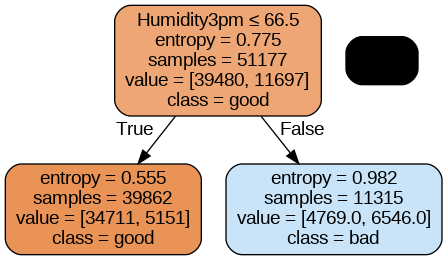

In [72]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

F1-Score: 0.5697074010327022


Text(50.722222222222214, 0.5, 'True')

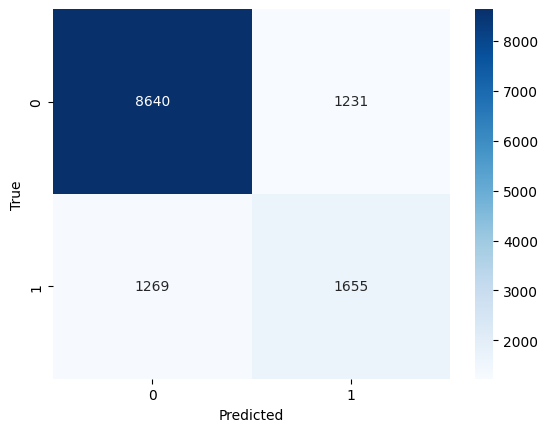

In [73]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [74]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))
print("Precision: "+str(precision))

Accuracy: 0.804611176240719
Recall: 0.5660054719562243
f1 score: 0.5697074010327022
Precision: 0.5734580734580734


In [75]:
arbol.predict_proba(x_test)

array([[0.87077919, 0.12922081],
       [0.87077919, 0.12922081],
       [0.87077919, 0.12922081],
       ...,
       [0.42147592, 0.57852408],
       [0.42147592, 0.57852408],
       [0.87077919, 0.12922081]])

In [113]:
dump(arbol, "decision_tree_model.joblib")

['decision_tree_model.joblib']

# Random Forest

## Entrenamiento sin Validacion Cruzada

In [76]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(#max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

In [78]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([False, False, False, ...,  True,  True, False])

In [79]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

test   pred
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False

Text(50.722222222222214, 0.5, 'True')

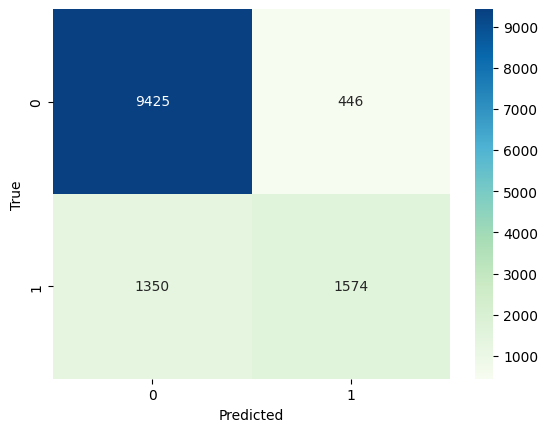

In [80]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.91      9871
        True       0.78      0.54      0.64      2924

    accuracy                           0.86     12795
   macro avg       0.83      0.75      0.77     12795
weighted avg       0.85      0.86      0.85     12795



In [82]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))
print("Precision: "+str(precision))

Accuracy: 0.8596326690113325
Recall: 0.5383036935704515
f1 score: 0.6367313915857605
Precision: 0.7792079207920792


## Grafico del arbol

In [83]:
model.classes_

array([False,  True])

In [84]:
model.estimators_[48]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=546147920)

In [85]:
# plt.figure(figsize=(100,100))
# # x_train, x_test, y_train, y_test = train_test_split(df_clean
# # RainTomorrow_Yes

# tree_plot_completo=tree.plot_tree(model.estimators_[48],
#                                  feature_names=ds_trabajo_x.columns.to_list(),
#                                  filled=True,
#                                  rounded=True,
#                                  class_names=['RainTomorrow_Yes']) #model.classes_
# plt.show(tree_plot_completo)

In [86]:
# plt.figure(figsize=(12,12))

# tree_plot=tree.plot_tree(model.estimators_[48],
#                          max_depth=2,
#                          feature_names=ds_trabajo_x.columns.to_list(),
#                          filled=True,
#                          rounded=True,
#                          class_names=True)

# plt.show(tree_plot)

In [87]:
# viz = dtreeviz.dtreeviz(
#     model.estimators_[48],
#     ds_trabajo_x,
#     ds_trabajo_y,
#     class_names=['Not Survived','Survived'],
#     title="Arbol de Decisión - Titanic dataset",
#     target_name='Survived',
#     feature_names=ds_trabajo_x.columns.to_list(),
#     scale=1.5
# )

# display(viz)

## Importancia de atributos

La documentación dice:

feature importances : ndarray of shape (nfeatures,)<br>
The higher, the more important the feature. <br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. <br>
It is also known as the Gini importance.<br>

feature importances : ndarray of shape (nfeatures,)<br>
Cuanto más alto, más importante es la característica.<br>
La importancia de una característica se calcula como la reducción total (normalizada) del criterio aportado por esa característica.<br>
También se conoce como la importancia de Gini.<br>

In [88]:
# sorted(list(zip(ds_trabajo_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

## Validacion Cruzada

In [89]:
# rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# param_grid = { "criterion" : ["gini", "entropy"],
#                "max_features": ["sqrt"],
#                "min_samples_leaf" : [1, 5, 10],
#                "min_samples_split" : [4, 10, 12],
#                "n_estimators": [10,20] }

# #Probamos entrenando sólo con 1 métrica
# gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1)
# gs_fit = gs.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast


In [116]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
               "max_features": ["sqrt"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [4, 10, 12],
               "n_estimators": [10,20] }

#Probamos entrenando sólo con 1 métrica
gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring="f1", cv=5, n_jobs=-1)
gs_fit = gs.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast


Veamos la mejor combinación de hiperparámetros

In [117]:
gs_fit.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

In [91]:
print("accuracy en entrenamiento con cv: "+str(gs_fit.best_score_))

accuracy en entrenamiento con cv: 0.8589210967049636


In [118]:
print("f1 en entrenamiento con cv: "+str(gs_fit.best_score_))

f1 en entrenamiento con cv: 0.6412802169316605


Predecimos utilizando el mejor modelo que obtuvimos en entrenamiento

In [119]:
#Obtenemos el mejor modelo
rf_cv_best=gs_fit.best_estimator_

#Predicción
y_pred_rf_cv_best = rf_cv_best.predict(x_test)

              precision    recall  f1-score   support

       False       0.88      0.95      0.91      9871
        True       0.76      0.55      0.64      2924

    accuracy                           0.86     12795
   macro avg       0.82      0.75      0.77     12795
weighted avg       0.85      0.86      0.85     12795



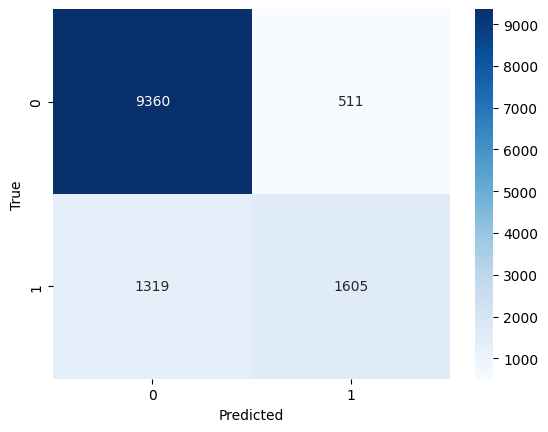

In [120]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_rf_cv_best)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred_rf_cv_best))

In [121]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_rf_cv_best)
recall=recall_score(y_test,y_pred_rf_cv_best)
f1=f1_score(y_test,y_pred_rf_cv_best)
precision = precision_score(y_test, y_pred_rf_cv_best)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))
print("Precision: " + str(precision))

Accuracy: 0.8569753810082064
Recall: 0.54890560875513
f1 score: 0.6369047619047619
Precision: 0.7585066162570888


In [122]:
dump(rf_cv_best, "random_forest_model.joblib")

['random_forest_model.joblib']

Probando de optimizar por metricas

In [95]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# param_grid = { "criterion" : ["gini", "entropy"],
#                "min_samples_leaf" : [1, 5, 10],
#                "min_samples_split" : [2, 4, 10, 12, 16],
#                "n_estimators": [10,20, 50] }
param_grid = { "criterion" : ["gini", "entropy"],
               "max_features": ["sqrt"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [4, 10, 12],
               "n_estimators": [10,20] }

#Probamos entrenando con varias métricas

metricas=['accuracy','f1','roc_auc'] #'recall','precision'

gs_multimetrica = GridSearchCV(estimator=rf_cv,
                               param_grid=param_grid,
                               scoring=metricas,
                               refit=False,
                               cv=5,
                               n_jobs=-1)
#Entrenamiento
gs_multimetrica_fit = gs_multimetrica.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast


Grafiquemos los resultados de las métricas

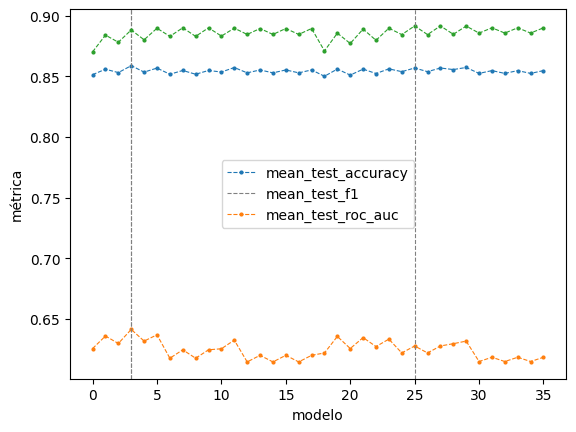

In [96]:
labels=[ key for key in gs_multimetrica_fit.cv_results_.keys() if("mean_test" in key)]

for k in labels:
    plt.plot(gs_multimetrica_fit.cv_results_[k],linestyle='--' , linewidth=0.8,marker='o',markersize=2)
    x_linea=np.argmax(gs_multimetrica_fit.cv_results_[k])
    plt.axvline(x_linea,linestyle='--' ,linewidth=0.8,color='grey')

plt.xlabel("modelo", fontsize=10)
plt.ylabel("métrica", fontsize=10)
plt.legend(labels)
plt.show()

Realizamos una predicción

In [97]:
params_elegidos=gs_multimetrica_fit.cv_results_['params'][np.argmax(gs_multimetrica_fit.cv_results_['mean_test_accuracy'])]
params_elegidos

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

In [98]:
#Creamos un clasificador RF
rfc_multimetrica = RandomForestClassifier(criterion= params_elegidos['criterion'],
                                          min_samples_leaf= params_elegidos['min_samples_leaf'],
                                          min_samples_split= params_elegidos['min_samples_split'],
                                          n_estimators=params_elegidos['n_estimators'],
                                          oob_score=True, random_state=2, n_jobs=-1)
#Entrenamos un modelo
model_rfc_multimetrica = rfc_multimetrica.fit(X = x_train, y = y_train)

#Hacemos una predicción
y_pred_model_rfc_multimetrica = model_rfc_multimetrica.predict(x_test)

              precision    recall  f1-score   support

       False       0.88      0.95      0.91      9871
        True       0.76      0.56      0.64      2924

    accuracy                           0.86     12795
   macro avg       0.82      0.75      0.78     12795
weighted avg       0.85      0.86      0.85     12795



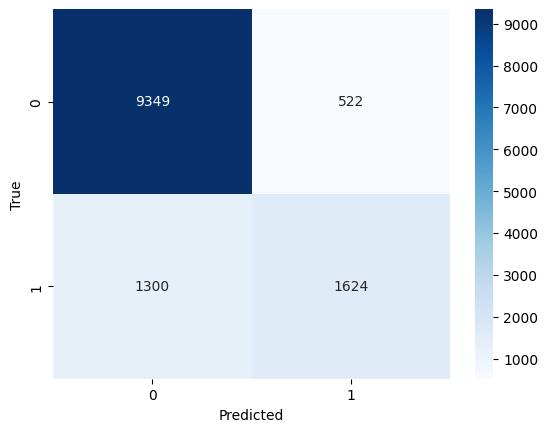

In [99]:
#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred_model_rfc_multimetrica)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred_model_rfc_multimetrica))

In [110]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_model_rfc_multimetrica)
recall=recall_score(y_test,y_pred_model_rfc_multimetrica)
f1=f1_score(y_test,y_pred_model_rfc_multimetrica)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))
print("Precision: " + str(precision))

Accuracy: 0.8576006252442361
Recall: 0.5554035567715458
f1 score: 0.6406311637080868
Precision: 0.7657342657342657


Optimizando por parametrica dio mejores resultados, por lo que nos quedamos con este modelo.

In [123]:
dump(model_rfc_multimetrica, "random_forest_model.joblib")

['random_forest_model.joblib']

# XGBoost

XGBoost es una forma más regularizada de Gradient Boosting . XGBoost utiliza la regularización avanzada (L1 y L2), que mejora las capacidades de generalización del modelo.

XGBoost ofrece un alto rendimiento en comparación con Gradient Boosting. Su entrenamiento es muy rápido y se puede paralelizar entre clústeres.

**Hiper-parámetros**

* learning_rate: tasa de aprendizaje
+ max_depth: máxima profundidad de cada árbol
* subsample: porcentaje de muestras usadas para cada árbol (valor muy bajo, posible underfitting)
* colsample_bytree: porcentaje de features usadas para cada árbol (valores muy alto, posible overfitting)
* n_estimators: cantidad de árboles a construir.
* objective: función de error a utilizar (algunas: reg:linear para regresión,reg:logistic o binary:logistic para clasificación)

**Parámetros de regularización:**

* **gamma**: umbral para hacer split basado en la reducción de error de hacer el nuevo split.
* **alpha**: regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización.
* **lambda**: similar alpha pero para la sintonia fina.

In [101]:
#Creo el modelo y lo entreno

import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

AUC: 0.8952085182021816
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      9871
        True       0.74      0.60      0.66      2924

    accuracy                           0.86     12795
   macro avg       0.82      0.77      0.79     12795
weighted avg       0.85      0.86      0.86     12795



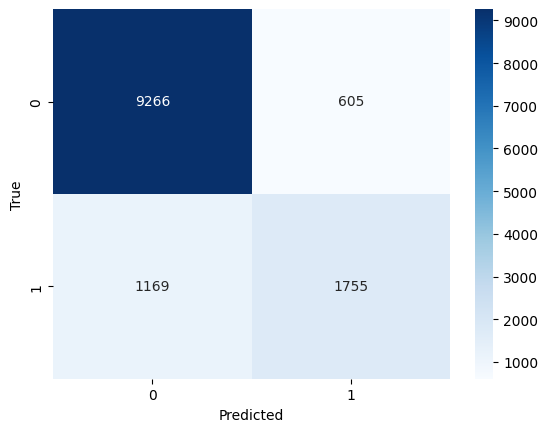

In [102]:
from sklearn.metrics import roc_auc_score

#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [111]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)

print("f1 score: "+str(f1))
print("Precision: " + str(precision))
print("Recall: "+str(recall))
print("Accuracy: "+str(accuracy))

Accuracy: 0.8665103556076592
Recall: 0.5991792065663475
f1 score: 0.6722947045280123
Precision: 0.7657342657342657


## Con CV

Con el método CV puedo entrenar el modelo y ver como impacta la modificacion de algun parámetro.

* nfolds: K del k-fold son 3 por defecto.
* num_boost_round: cantidad de árboles a contruir (n_estimators)
* metrics: la métrica de evaluación a utilizar
* as_pandas: si los resultados lo devuelve en un DataFrame de pandas
* early_stopping_rounds: terminar antes si la métrica no mejora luego de una cantidad de iteraciones (por defecto 9)
* seed: semilla para poder reproducir los resultados

In [104]:
#Datos de entrenamiento en formaro DMatrix
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

#Entreno CV para probar el learning rate
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.1},num_boost_round=8,metrics='auc')
results

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.864213       0.001129       0.852945      0.004151
1        0.872978       0.001437       0.861618      0.003243
2        0.877168       0.001346       0.865531      0.003313
3        0.880731       0.001171       0.868907      0.003038
4        0.882346       0.000872       0.870076      0.003233
5        0.884534       0.000996       0.872325      0.003499
6        0.886384       0.001040       0.874003      0.003350
7        0.887721       0.001213       0.875214      0.003544

In [105]:
#Entreno CV para probar el learning rate mas alto
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.2},num_boost_round=8,metrics='auc',seed=0)
results

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.864213       0.001129       0.852945      0.004151
1        0.875513       0.000795       0.863766      0.004578
2        0.881345       0.000503       0.869449      0.004057
3        0.885137       0.000760       0.872620      0.003921
4        0.888082       0.000723       0.874937      0.004434
5        0.891302       0.000388       0.877431      0.004848
6        0.893509       0.000901       0.879179      0.004443
7        0.895940       0.000587       0.880740      0.004446

In [106]:
# Definir el rango de hiperparámetros a buscar
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

In [107]:
# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(x_train, y_train)

# Imprimir los mejores parámetros
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}


In [108]:
# Predecir los valores de y_test utilizando el mejor modelo
y_pred = grid_search.best_estimator_.predict(x_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy: " + str(accuracy))
print("Recall: " + str(recall))
print("f1 score: " + str(f1))
print("Precision: " + str(precision))

Accuracy: 0.8665103556076592
Recall: 0.5991792065663475
f1 score: 0.6722947045280123
Precision: 0.7657342657342657


In [115]:
dump(grid_search.best_estimator_, "xgboost_model.joblib")

['xgboost_model.joblib']